# Imports

In [14]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

# Data

In [15]:
df = pd.read_csv('../data/DEvideos.csv')

df['trending_date'] = df.apply(lambda row: datetime.strptime(row['trending_date'], '%y.%d.%m'), axis=1)
df['publish_time'] = df.apply(lambda row: datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z'), axis=1)
df['days_until_trending'] = df.apply(lambda row: ((row['trending_date'] - row['publish_time']).days + 1), axis=1)

dropColumns = ['video_id', 'title', 'thumbnail_link', 'description']
df.drop(columns=dropColumns, inplace=True)

df.head()

,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,days_until_trending
0,2017-11-14,inscope21,24,2017-11-13 17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,False,False,False,1
1,2017-11-14,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,False,False,False,2
2,2017-11-14,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,False,False,False,1
3,2017-11-14,100SekundenPhysik,27,2017-11-12 15:00:01,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,False,False,False,2
4,2017-11-14,rezo,24,2017-11-12 13:10:36,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,False,False,False,2


# Input of tag factor

In [16]:
# tag_df = pd.read_csv('../data/tags.csv')
# tag_df = tag_df.set_index('tag')
# tag_df.head()

,factor,count
tag,,
full game,0.880435,23
split,0.862500,20
wellness,0.852273,22
neuer modus,0.843750,24
lcs,0.840909,22


## Converter function

In [17]:
# def calculate_tag_factor(tag_string, tag_data):
#     tag_list = pd.Series(list(set(map(lambda x: x.strip('\"').lower(), tag_string.split('|')))))
#     return tag_list.apply(lambda tag: tag_data['factor'].get(tag, np.nan)).mean(skipna=True)

## Test function

In [18]:
# df['tag_factors'] = df['tags'].apply(lambda x: calculate_tag_factor(x, tag_df))
# df['tag_factors'] = df.apply(lambda row: 0 if np.isnan(row['tag_factors']) else row['tag_factors'], axis=1)
# df[['channel_title','tags','tag_factors']]

,channel_title,tags,tag_factors
0,inscope21,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",0.512928
1,LUKE! Die Woche und ich,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",0.612439
2,LastWeekTonight,"last week tonight trump presidency|""last week ...",0.686567
3,100SekundenPhysik,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",0.633594
4,rezo,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",0.541702
...,...,...,...
40835,Kingdom Hearts,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",0.725610
40836,YourMovieSucksDOTorg,[none],0.000000
40837,Grünwald Freitagscomedy,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",0.661601
40838,Assassin's Creed DE,"Assassin's Creed|""Assassins Creed""|""Assassin's...",0.654359


In [19]:
def assign_target_category(row):
    if row['days_until_trending'] == 0:
        return '0 Days'
    elif row['days_until_trending'] == 1:
        return '1 Day'
    elif row['days_until_trending'] == 2:
        return '2 Days'
    elif row['days_until_trending'] < 10:
        return '< 10 Days'
    elif row['days_until_trending'] < 100:
        return '< 100 Days'
    elif row['days_until_trending'] < 1000:
        return '< 1000 Days'
    else:
        return '>= 1000 Days'

df['target_category'] = df.apply(assign_target_category, axis=1)

df.head()

df.dtypes

trending_date             datetime64[ns]
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
days_until_trending                int64
tag_factors                      float64
target_category                   object
dtype: object

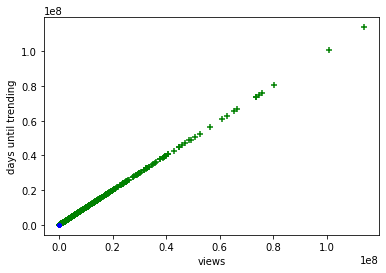

In [20]:
plt.xlabel('views')
plt.ylabel('days until trending')
plt.scatter(df.views, df.views, color='green', marker='+')
plt.scatter(df.days_until_trending, df.days_until_trending,color="blue",marker='.')


# Model training and fitting

In [22]:
# Use multiple columns
#x = pd.DataFrame(df.iloc[:, 4:6])
# Use single column
x = pd.DataFrame(df['views'])
y = pd.DataFrame(df['target_category']).values.ravel()

x = preprocessing.scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = SVC(kernel='rbf', random_state = 1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6242654260528894

## Prediction

In [ ]:
model.predict([[45000]])